# A trip on a lift
### Experiment about the motion in 1D and Data Analysis

The motion of a lift can be considered as an example of a motion along a straight line, which we can shortly refer to as **motion in 1D**. 

The aim of this worked example is that of studying the position, the velocity and the acceleration as a function of time.

![](img/ascensore.png)


#### Description

The position of the lift along the vertical direction can be recorded using the smartphone with the App [**phyphox**](https://phyphox.org/). 

This App can measure the atmospheric pressure and can calculate the change of the height with respect to the initial position, exploiting a suitable algorithm.

The activity will be developed according to the following steps.

1. We **run an experiment** recording the values of the height as a function of time.
2. The experimental data are stored in a text file (*Tab separated values*) having the structure shown below

Time (s) | Pressure (hPa) | Height (m) | Xxxxxx | Xxxxxxxx 
---------|----------------|------------|--------|----------
1.002612265E0 | 1.013205700E3 | 0.000000000E0| XXXXXX | XXXXXX
2.003274159E0 | 1.013197046E3 | 7.205260740E-2| XXXXXX | XXXXXX

3. For the purpose of the present study we want to read data from first and third column, so to get a **timetable** of the motion, i.e. a set of data organized as follows

Time (s) | Height (m) 
---------|----------------
1.002612265E0 | 0.000000000E0
2.003274159E0 | 7.205260740E-2

4. Once we have got our experimental data, we want to obtain a graphical representation. We prepare a plot using Python and the  [MatPlotLib](https://matplotlib.org/) module.

5. We want to **analyze the data** to obtain the values of the velocity as a function of time.

6. We prepare a graph to visualize the behaviour of the **velocity** as a function of time.

7. We save the plots and the results of the analysis in a file.

8. We discuss the results

9. We calculate the values of the **acceleration** as a function of time and we compare them with the values measured using another sensor of the smartphone (the accelerometer) with the same App, Phyphox.

10. We consider all the results obtained showing them in a figure that contains the plot of the heigth, the plot of the velocity and the plot of the acceleration.

&nbsp;

##### 1. Experiment
Install on the smartphone the App [phyphox](https://phyphox.org). Among the experiments available in the group named **Everyday life**, choose the experiment **Elevator**. Press **play** to start the measurement.

[![](img/phyphox.png)](https://phyphox.org)

* You can see what happens if you move the smartphone from the ground up to your head.
* You can obtain interesting data if you can get into **a lift** and get it moving.

&nbsp;

##### 2. Save the data
Pressing on the symbol of the three vertical dots in the top right part of the screen you can choose **Export data**. A preferred format can be selected. In this example we choose **CSV(Tabulator, decimal point)**.

Once the data have been saved in a file, the file can be transferred from the smartphone to the computer for the further steps of the experiments.

> We have made the experiments several times and we have selected a few data sets for subsequent analysis.
>
> The filenames are listed in the following table.

&nbsp;

Data available |
-----------------|
Trip01-Height.csv
Trip02-Height.csv
Trip03-Height.csv

&nbsp;

##### 3.-4.  Read the experimental data and prepare a plot
For reading the data and for plotting them in a figure we use Python modules [numpy](https://numpy.org/) and [matplotlib](https://matplotlib.org/).
We write a Python code based on the examples proposed in Refs.  [1](https://physics.nyu.edu/pine/pymanual/html/pymanMaster.html), [2](http://stacks.iop.org/PhysED/55/033006/mmedia) e [3](https://github.com/POSS-UniMe/RCwithRPi).

To read the data from a text file we use the **loadtxt** function from the **numpy** module. The option **skiprows** allows us to skip the firs $n$ lines of the text, and the option **usecols** allows us to select the desired columns (Ref. [4](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html))

&nbsp;

In [1]:
import numpy as np
import matplotlib.pyplot as plt

inputDataFile='data/Trip03-Height.csv'

# read data from file
t, x = np.loadtxt(inputDataFile, skiprows=1, usecols=(0,2), unpack = True)

# plot of the experimental data
plt.plot(t, x, 'o', color='blue', markersize = 3)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.xlabel('time  $t$ (s)')
plt.ylabel('height $h$ (m)')
plt.text(27, 1.8, inputDataFile)

#plt.savefig('height_vs_time.pdf')
print()
plt.show()
print()

<Figure size 640x480 with 1 Axes>

##### 5. Calculating the velocity
We calculate the average velocity referred to each time interval such as $[t_1, t_2]$ using the simple relation
$$ v = \dfrac{\Delta x}{\Delta t}$$

We associate this value $v_1$ to the time $t'_1$ obtained as the average value between $t_1$ and $t_2$.

To calculate the displacement $\Delta x$ and the duration of each time lapse $\Delta t$ between two subsequent measurements we use the  [**diff()**](https://numpy.org/doc/stable/reference/generated/numpy.diff.html) function of the **numpy** module.

The calculated values will be written on a text file named  **speedDataFile**. 
> The data will be written in two columns: the first one is about the values of time,
> the second is about the values of the velocity.

&nbsp;

The lines to be added to the previous script in order to make the calculations and save the data on a file are shown below.

&nbsp;


In [2]:

speedDataFile='data/Trip03-Speed.csv'

np.set_printoptions(precision=20)
delta_t = np.diff(t)
delta_x = np.diff(x)
v = delta_x / delta_t
t_prime = t[:-1] + (delta_t/2)

np.savetxt(speedDataFile, np.column_stack((t_prime, v)))

&nbsp;
##### 6. Plot of the velocity as a function of time

We use the **Matplotlib** module for preparing a plot of the velicty as a function of time.

We will insert in the plot also a label containing the name of the file from which we read the values of time and velocity.

&nbsp;

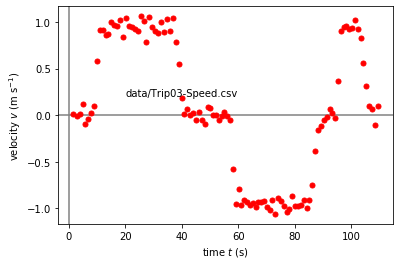

In [3]:
plt.plot(t_prime, v, 'o', color='red', markersize = 5)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.xlabel('time $t$ (s)')
plt.ylabel('velocity $v$ (m s$^{-1}$)')
plt.text(20, 0.2, speedDataFile)
plt.draw()
plt.show()

##### 7. Plotting together altitude and velocity
We want to show together in the same figure the two previous plots, so to compare them. 

We prepare a figure in which the two plots are organized as two rows and one column. This is achieved using the **subplot** function of the  **matplotlib** module (See Refs.[5](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplot.html), [6](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html))

&nbsp;

Text(20, 0.2, 'data/Trip03-Speed.csv')

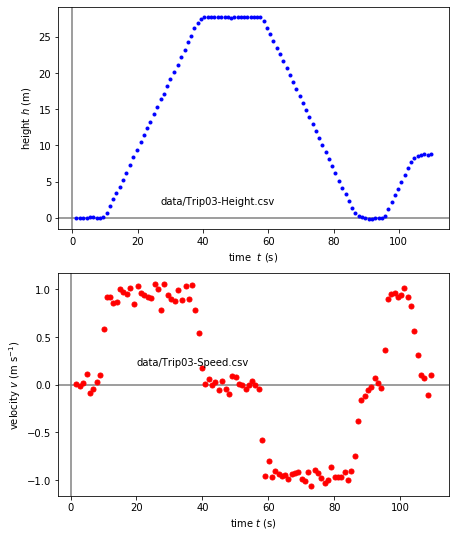

In [4]:
fig = plt.figure(figsize=(7, 9))

plt.subplot(2, 1, 1)
plt.plot(t, x, 'o', color='blue', markersize = 3)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.xlabel('time  $t$ (s)')
plt.ylabel('height $h$ (m)')
plt.text(27, 1.8, inputDataFile)


plt.subplot(2, 1, 2)
plt.plot(t_prime, v, 'o', color='red', markersize = 5)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.xlabel('time $t$ (s)')
plt.ylabel('velocity $v$ (m s$^{-1}$)')
plt.text(20, 0.2, speedDataFile)


&nbsp;
##### 8. Data analysis
* ***8.1 Insert a marker in the plot***

We want to insert in the plot some **markers** that allow us to select the data corresponding to a desired value of the time.
We are assuming that the data are already ordered according to increasing values of the time.

The number of (time $t$, height $h$) pairs is given by the size of the corresponding numpy array. For instance:

In [5]:
np.size(t)

108

 We want to select a subset of the data, for time values between that corresponding to **MarkerOne** and that corresponding to **MarkerTwo**. 

* The values of the two markers are chosen using some **sliders** and
* they are highlighted in the plots as colored vertical lines.

<hr>

> For running the Python code contained in this Notebook you can use the following link to the **binder** environment online

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/POSS-UniMe/simple-physics-with-Python/HEAD)

&nbsp;

In [6]:
import ipywidgets as widgets

sliderMarkerOne = widgets.IntSlider(min = 0, max = (np.size(t)-1), step = 1, value = 10, continuous_update = False)
sliderMarkerTwo = widgets.IntSlider(min = 0, max = (np.size(t)-1), step = 1, value = 35, continuous_update = False)

def calculate(MarkerOne, MarkerTwo):
        print('Marker One = ',MarkerOne, '      Marker Two = ', MarkerTwo, '\n')
        MarkerOneTime = t[MarkerOne]   
        MarkerTwoTime = t[MarkerTwo]
        print ('Time One', MarkerOneTime, 's', '      Time Two = ', MarkerTwoTime, '\n')
        makeplots(MarkerOne,MarkerTwo)
        t_subset = t[MarkerOne:MarkerTwo]
        x_subset = x[MarkerOne:MarkerTwo]
        
def makeplots(MarkerOne, MarkerTwo):
    fig = plt.figure(figsize=(7, 9))
   # plt.ion()
    plt.subplot(2, 1, 1)
    plt.plot(t, x, 'o', color='blue', markersize = 3)
    plt.plot(t[MarkerOne],x[MarkerOne], 'o', color='red', markersize = 6)
    plt.plot(t[MarkerTwo],x[MarkerTwo], 'o', color='cyan', markersize = 7)
    plt.axhline(color = 'gray', zorder = -1)
    plt.axvline(color = 'gray', zorder = -1)
    plt.axvline(color = 'magenta', x = t[MarkerOne], zorder = -1)
    plt.axvline(color = 'cyan', x = t[MarkerTwo], zorder = -1)
    plt.xlabel('time  $t$ (s)')
    plt.ylabel('height $h$ (m)')
    plt.text(27, 1.8, inputDataFile)


    plt.subplot(2, 1, 2)
    plt.plot(t_prime, v, 'o', color='red', markersize = 5)
    plt.axhline(color = 'gray', zorder = -1)
    plt.axvline(color = 'gray', zorder = -1)
    plt.axvline(color = 'magenta', x = t[MarkerOne], zorder = -1)
    plt.axvline(color = 'cyan', x = t[MarkerTwo], zorder = -1)
    plt.xlabel('time $t$ (s)')
    plt.ylabel('velocity $v$ (m s$^{-1}$)')
    plt.text(20, 0.2, speedDataFile)
        
widgets.interact(calculate, MarkerOne = sliderMarkerOne, MarkerTwo = sliderMarkerTwo)

interactive(children=(IntSlider(value=10, continuous_update=False, description='MarkerOne', max=107), IntSlide…

<function __main__.calculate(MarkerOne, MarkerTwo)>

&nbsp;

* ***8.2 Linear fit of the $x(t)$ data in a selected time range***

Ipothesys: motion with constant velocity

If we assume that in a certain time interval the velocity is constant, then, for $t_1$ and $t_2$ chosen in such range, the ratio $ (x_2-x_1)/(t_2-t_1) $ is constant and it is equal to $v$.

For a generic $t$ and a fixed $t_1$, the following relation has to hold

$$ \dfrac{x-x_1}{t-t_1} = v $$

From this it follows

$$ x - x_1 = v (t-t_1)$$

so that

$$x = v t + (x_1 - v t_1) $$


As a consequence, in a time range in which the motion occurs with constant velocity, the graph of $x$ as a function of $t$ appears as a straight line, corresponding to an equation of this kind:

$$ x = A t + B $$

We want to find now the values of the parameters $A$ and $B$ corresponding to the straight line that gives the best match with the experimental data. Such values will be found using a method that minimizes the sum of the squared deviations between the measured data and the model. \[[7](https://nbviewer.jupyter.org/github/engineersCode/EngComp1_offtheground/blob/master/notebooks_en/5_Linear_Regression_with_Real_Data.ipynb), [8](https://physics.nyu.edu/pine/pymanual/html/chap7/chap7_funcs.html#example-linear-least-squares-fitting\)].

&nbsp;

In [7]:
t_subset = t[sliderMarkerOne.value:sliderMarkerTwo.value]
x_subset = x[sliderMarkerOne.value:sliderMarkerTwo.value]

def LineFit(x,y):
    x_avg = x.mean()
    slope =  (y*(x-x_avg)).sum()/(x*(x-x_avg)).sum()
    y_intercept = y.mean() - slope * x_avg
    return slope, y_intercept

v_est, x_intercept = LineFit(t_subset, x_subset)


print('\n Estimated value of the velocity (from the linear fit)')
print('\n v = {0:0.3} m/s \n'.format(v_est))
#print('$x_intercept$', x_intercept, 'm', '\n')



 Estimated value of the velocity (from the linear fit)

 v = 0.949 m/s 



* ***8.3 Plot of the comparison between the experimental data and the linear fit***

We want to draw a graph showing the experimental data as well as the behaviour expected in case of motion with constant velocity, referred to some time interval. We will use the values of the parameters obtained from the **best-fit** procedure described in the previous section.

We can add more details to the graph using the following functions :  [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html),
[linestyle](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html), 
[axvline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html), 
[legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html).

Finally, we save the figure in a file, using the [savefig](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)
function of the **matplotlib** module.

&nbsp;

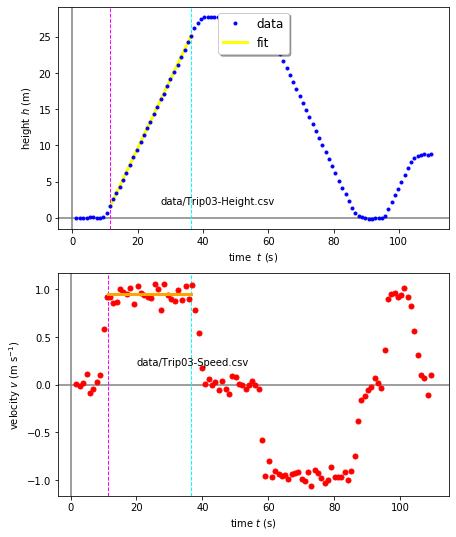

In [8]:
x_fit = v_est * t_subset + x_intercept

#
v_fit = x_fit/x_fit*v_est
#
print()

fig = plt.figure(figsize=(7, 9))
   # plt.ion()
plt.subplot(2, 1, 1)
plt.plot(t, x, 'o', color='blue', markersize = 3, label = 'data')
plt.plot(t_subset,x_fit, '-', color='yellow', linewidth = 3, zorder = -1, label = 'fit')
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.axvline(color = 'magenta', x = t_subset[0], linewidth = 1, linestyle = '--', zorder = -1)
plt.axvline(color = 'cyan', x = t_subset[-1],linewidth = 1, linestyle = '--', zorder = -1)
plt.xlabel('time  $t$ (s)')
plt.ylabel('height $h$ (m)')
plt.text(27, 1.8, inputDataFile)
plt.legend(loc='upper center', shadow=True, fontsize='large')


plt.subplot(2, 1, 2)
plt.plot(t_prime, v, 'o', color='red', markersize = 5)
plt.plot(t_subset,v_fit,'-', color = 'orange', linewidth = 3)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.axvline(color = 'magenta', x = t_subset[0], linewidth = 1, linestyle = '--', zorder = -1)
plt.axvline(color = 'cyan', x = t_subset[-1], linewidth = 1, linestyle = '--', zorder = -1)
plt.xlabel('time $t$ (s)')
plt.ylabel('velocity $v$ (m s$^{-1}$)')
plt.text(20, 0.2, speedDataFile)

plt.savefig('data/height+speed.pdf')


##### 9. Acceleration

In this section we will calculate the acceleration from the velocity data but we will also compare the calculated data with the experimental values of the acceleration directly measured with another sensor of the smartphone. 

* ***9.1  Calculation***

The task is similar to that of calculating the average velocity referred to different time intervals. 

The average acceleration in each time interval of the kind $[t'_1, t'_2]$ is calculated on the basis of the simple relation
$$ a = \dfrac{\Delta v}{\Delta t}$$

We associate this value $a_1$ with the time $t''_1$ obtained as average value between $t'_1$ and $t'_2$.

For calculating the changes of velocity, i.e. for calculating $\Delta v$, as well as for calculating the extent of the time lapses $\Delta t'$ between two subsequent data we use the **numpy.diff()** function.

The results of the calculation will be written in a text file whose name is associated with the variable **accelerationDataFile**. The text is organized in two colums: in the first column are reported the values of time, in the second one are reported the values of the acceleration. It is suggested to choose for the file a name which is suitable to remind that the file is about **calculated values** of the acceleration. 

&nbsp;

In [9]:

accelerationDataFile='data/Trip03-CalcAcceleration.csv'

np.set_printoptions(precision=20)
delta_t_prime = np.diff(t_prime)
delta_v = np.diff(v)
a = delta_v / delta_t_prime
t_double_prime = t_prime[:-1] + (delta_t_prime/2)

np.savetxt(accelerationDataFile, np.column_stack((t_double_prime, a)))

* ***9.2 Graph*** 

We want to show in a graph the behaviour of the acceleration $a$ as a function of time. Moreover, we want to make the comparison with the **values** of acceleration **measured** with an accelerometer sensor. We are talking about the values measured with the same **phyphox** App of the smartphone, and saved in a text file (*Tab separated values*) organized as follows


Time (s) | Acceleration (m/s$^2$)  
---------|----------------
2.003207003250000007e+00 | -9.390230845239912194e-02 


The name of the text file containing the experimental data is associated with the variable **accelerometerDataFile**

&nbsp;

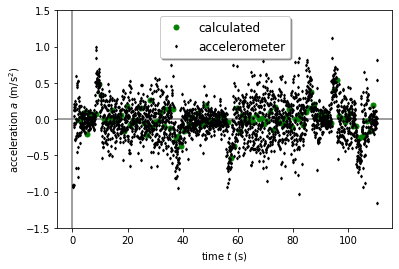

In [10]:
print()
#
#
accelerometerDataFile='data/Trip03-Acceleration.csv'
#
# read data from file
t_exp, accel = np.loadtxt(accelerometerDataFile, skiprows=1, unpack = True)


plt.plot(t_double_prime, a, 'o', color='green', markersize = 5, label = 'calculated')
plt.plot(t_exp,accel, 'd', color = 'black', markersize = 2, label = 'accelerometer')
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.xlabel('time $t$ (s)')
plt.ylabel('acceleration $a$ (m/s$^{2}$)')
plt.ylim(-1.5,1.5)
plt.legend(loc='upper center', shadow=True, fontsize='large')
plt.draw()
plt.show()

#### A hint
> How can we interpret such apparently messy data about the acceleration in this experiment?

The results can be efficiently discussed if we compare this plot with the graph showing the behaviour of the velocity as a function of time.

##### 10. Comparing the plots of altitude, velocity and acceleration
We will prepare a figure in which we have the three plots organized as a matrix of three rows and one column. To this aim we will use the  **subplot** function. The figure will be saved in a file, using the  **savefig** function of the Matplotlib module.

&nbsp;


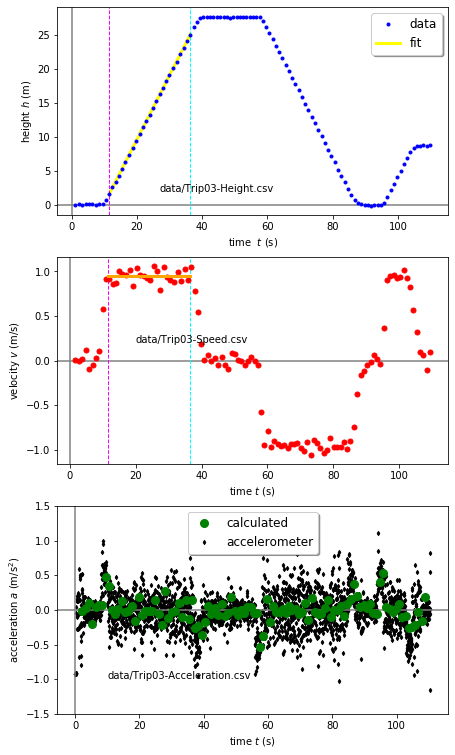

In [11]:
print()

fig = plt.figure(figsize=(7, 13))
   # plt.ion()
plt.subplot(3, 1, 1)
plt.plot(t, x, 'o', color='blue', markersize = 3, label = 'data')
plt.plot(t_subset,x_fit, '-', color='yellow', linewidth = 3, zorder = -1, label = 'fit')
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.axvline(color = 'magenta', x = t_subset[0], linewidth = 1, linestyle = '--', zorder = -1)
plt.axvline(color = 'cyan', x = t_subset[-1],linewidth = 1, linestyle = '--', zorder = -1)
plt.xlabel('time  $t$ (s)')
plt.ylabel('height $h$ (m)')
plt.text(27, 1.8, inputDataFile)
plt.legend(loc='upper right', shadow=True, fontsize='large')


plt.subplot(3, 1, 2)
plt.plot(t_prime, v, 'o', color='red', markersize = 5)
plt.plot(t_subset,v_fit,'-', color = 'orange', linewidth = 3)
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.axvline(color = 'magenta', x = t_subset[0], linewidth = 1, linestyle = '--', zorder = -1)
plt.axvline(color = 'cyan', x = t_subset[-1], linewidth = 1, linestyle = '--', zorder = -1)
plt.xlabel('time $t$ (s)')
plt.ylabel('velocity $v$ (m/s)')
plt.text(20, 0.2, speedDataFile)

plt.subplot(3, 1, 3)
plt.plot(t_double_prime, a, 'o', color='green', markersize = 8, label = 'calculated')
plt.plot(t_exp,accel, 'd', color = 'black',zorder=-1, markersize = 3, label = 'accelerometer')
plt.axhline(color = 'gray', zorder = -1)
plt.axvline(color = 'gray', zorder = -1)
plt.xlabel('time $t$ (s)')
plt.ylabel('acceleration $a$ (m/s$^{2}$)')
plt.ylim(-1.5,1.5)
plt.legend(loc='upper center', shadow=True, fontsize='large')
plt.text(10, -1, accelerometerDataFile)

plt.savefig('data/Trip03-Results.pdf')

plt.draw()
plt.show()
print()

This figure can be compared directly with the figure produced by the **phyphox** App. In this way we can verify whether our evaluation of the data leads to the same results as the **phyphox** software.

&nbsp;

## What we have learned
*Physics*
* How to acquire the data concerning an experiment carried out with portable equiment (a smartphone with the **phyphox** app)
* How to evaluate the data about position and time in order to calculate the velocity and the acceleration.
* How to study the motion considering the graphical behaviour of the variables that describe the position, the velocity, and the acceleration.

*Python*

* Read data from a text file
* Plot the data in a graph
* Save the calculated data in a text file
* Prepare a figure including several plots
* Select a subset of the data
* Obtain a linear fit of a data set
* Compare several datasets in the same plot
* Save a figure to a file.

&nbsp;

## References and notes

#### Images
1. The *Andrea Donato* building at the University of Messina offers a nice view on the Strait of Messina. This will be the headquarters of the Mathematics, Data Science and Computer Science Center of the University. We imagine the building equipped with a panoramic lift.

#### Graphical representation of the experimental data
1. [Introduction to Python for Science and Engineering](https://physics.nyu.edu/pine/pymanual/html/pymanMaster.html)
2. [Experiments and data analysis on one-dimensional motion with Raspberry Pi and Python](http://stacks.iop.org/PhysED/55/033006/mmedia)
3. [Circuits with Raspberry Pi and Python](https://github.com/POSS-UniMe/RCwithRPi)
4. [Reading data from a text file with **loadtxt**](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)
     * "This function aims to be a fast reader for simply formatted files. The **genfromtxt** function provides more sophisticated handling of, e.g., lines with missing values."
5. [Including more plots in a figure](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplot.html) 
6. [Multiple plots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) with Matplotlib

#### Linear fit of the data

7. Lorena A. Barba, Natalia C. Clementi,  *Linear regression with real data*, [Engineering Computation](https://nbviewer.jupyter.org/github/engineersCode/EngComp1_offtheground/blob/master/notebooks_en/5_Linear_Regression_with_Real_Data.ipynb), GitHub 

8. David J. Pine, *Linear least squares fitting*, 
 [Introduction to Python for Science](https://physics.nyu.edu/pine/pymanual/html/chap7/chap7_funcs.html#example-linear-least-squares-fitting) 
 
#### Functions of the *matplotlib* module

9. [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

10. [linestyle](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html)

11. [axvline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html)

12. [legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)

13. [savefig](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html)

#### Experiment with **phyphox**
14. [Elevator](https://phyphox.org/wiki/index.php/Experiment:_Elevator)


&nbsp;

### Copyright and License
--------------------------
 (c) 2021 Andrea Mandanici, Giuseppe Mandaglio, Giovanni Pirrotta, Valeria Conti Nibali, Giacomo Fiumara. All content is under Creative Common Attribution CC BY 4.0 and all code is under BSD 3-Clause License. Notebook based on the Italian version (c) 2020 Andrea Mandanici, Marco Guarnera, Giuseppe Mandaglio, Giovanni Pirrotta. All content is under Creative Common Attribution  <a rel="license" href="https://creativecommons.org/licenses/by/4.0" > CC BY 4.0 <a/> 
 and all code is under [BSD 3-Clause License](https://opensource.org/licenses/BSD-3-Clause)

